# Importing and reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [2]:
df = pd.read_csv('../data/creditcard.csv')

# Basic data overview

In [3]:
print(f'Shape of the dataset: {df.shape}')
print('='*80)
print('')
print('='*80)
print(df.info())
print('='*80)
print('')
print('='*80)
print(df.describe())
print('='*80)
print('')
print('='*80)
print(df.head())

Shape of the dataset: (284807, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     2848

# Missing Values

In [4]:
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

Missing values per column:
Series([], dtype: int64)


# Target Variable Distribution

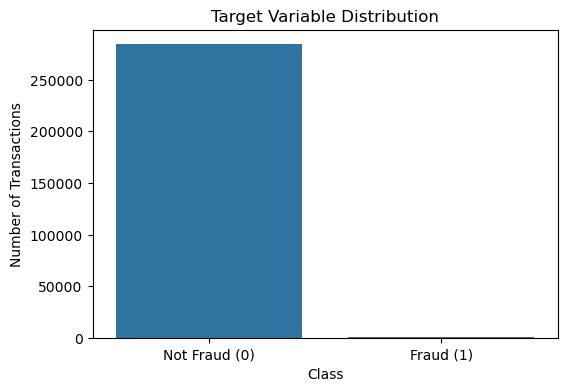

Fraud percentage: 0.1727%


In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Target Variable Distribution')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.show()

# Percentage of frauds
fraud_pct = df['Class'].value_counts(normalize=True)[1] * 100
print(f'Fraud percentage: {fraud_pct:.4f}%')


# Distribution of Time and Amount

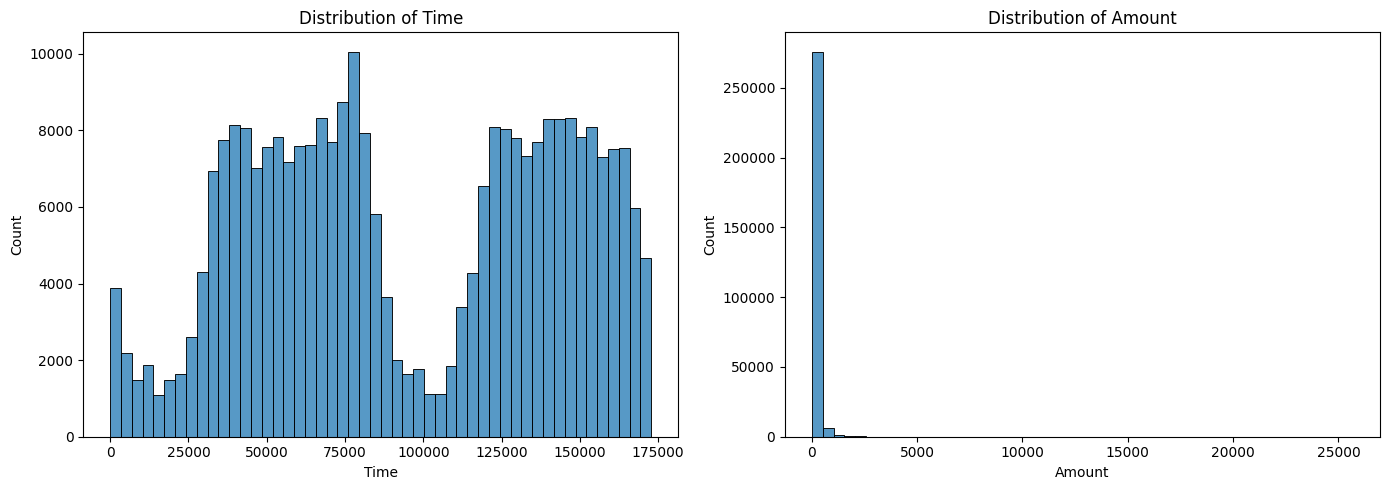

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(df['Time'], bins=50, ax=ax[0])
ax[0].set_title('Distribution of Time')

sns.histplot(df['Amount'], bins=50, ax=ax[1])
ax[1].set_title('Distribution of Amount')

plt.tight_layout()
plt.show()


# Statistics: Fraud vs Non-Fraud Transactions

In [6]:
frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0]

print("Average transaction amount:")
print("Fraud:", frauds['Amount'].mean())
print("Non-Fraud:", non_frauds['Amount'].mean())
print('')
print("Maximum transaction amount:")
print("Fraud:", frauds['Amount'].max())
print("Non-Fraud:", non_frauds['Amount'].max())

Average transaction amount:
Fraud: 122.21132113821139
Non-Fraud: 88.29102242231328

Maximum transaction amount:
Fraud: 2125.87
Non-Fraud: 25691.16


# Correlation with Target Variable

Correlation with Class:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


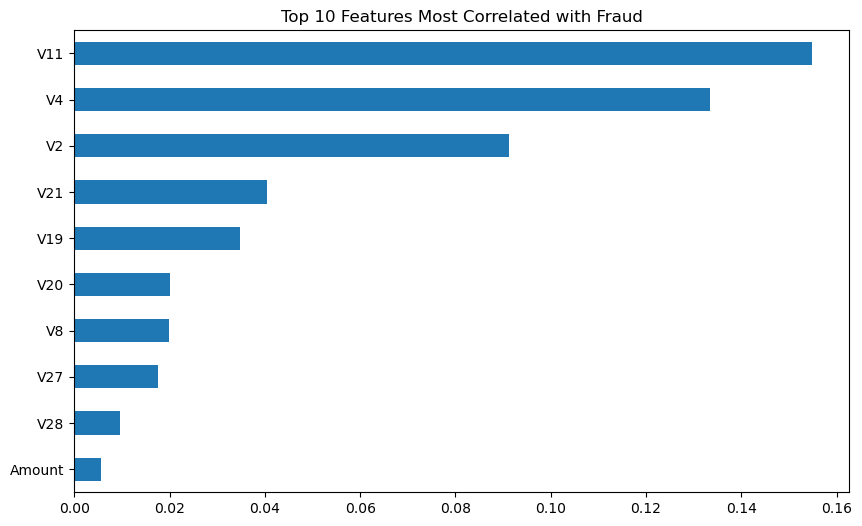

In [7]:
corr_matrix = df.corr()

# Correlation with the target
corr_with_class = corr_matrix['Class'].sort_values(ascending=False)
print("Correlation with Class:")
print(corr_with_class)

# Top 10 correlated features
plt.figure(figsize=(10, 6))
corr_with_class.drop('Class').sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Features Most Correlated with Fraud')
plt.gca().invert_yaxis()
plt.show()

# Correlation Heatmap

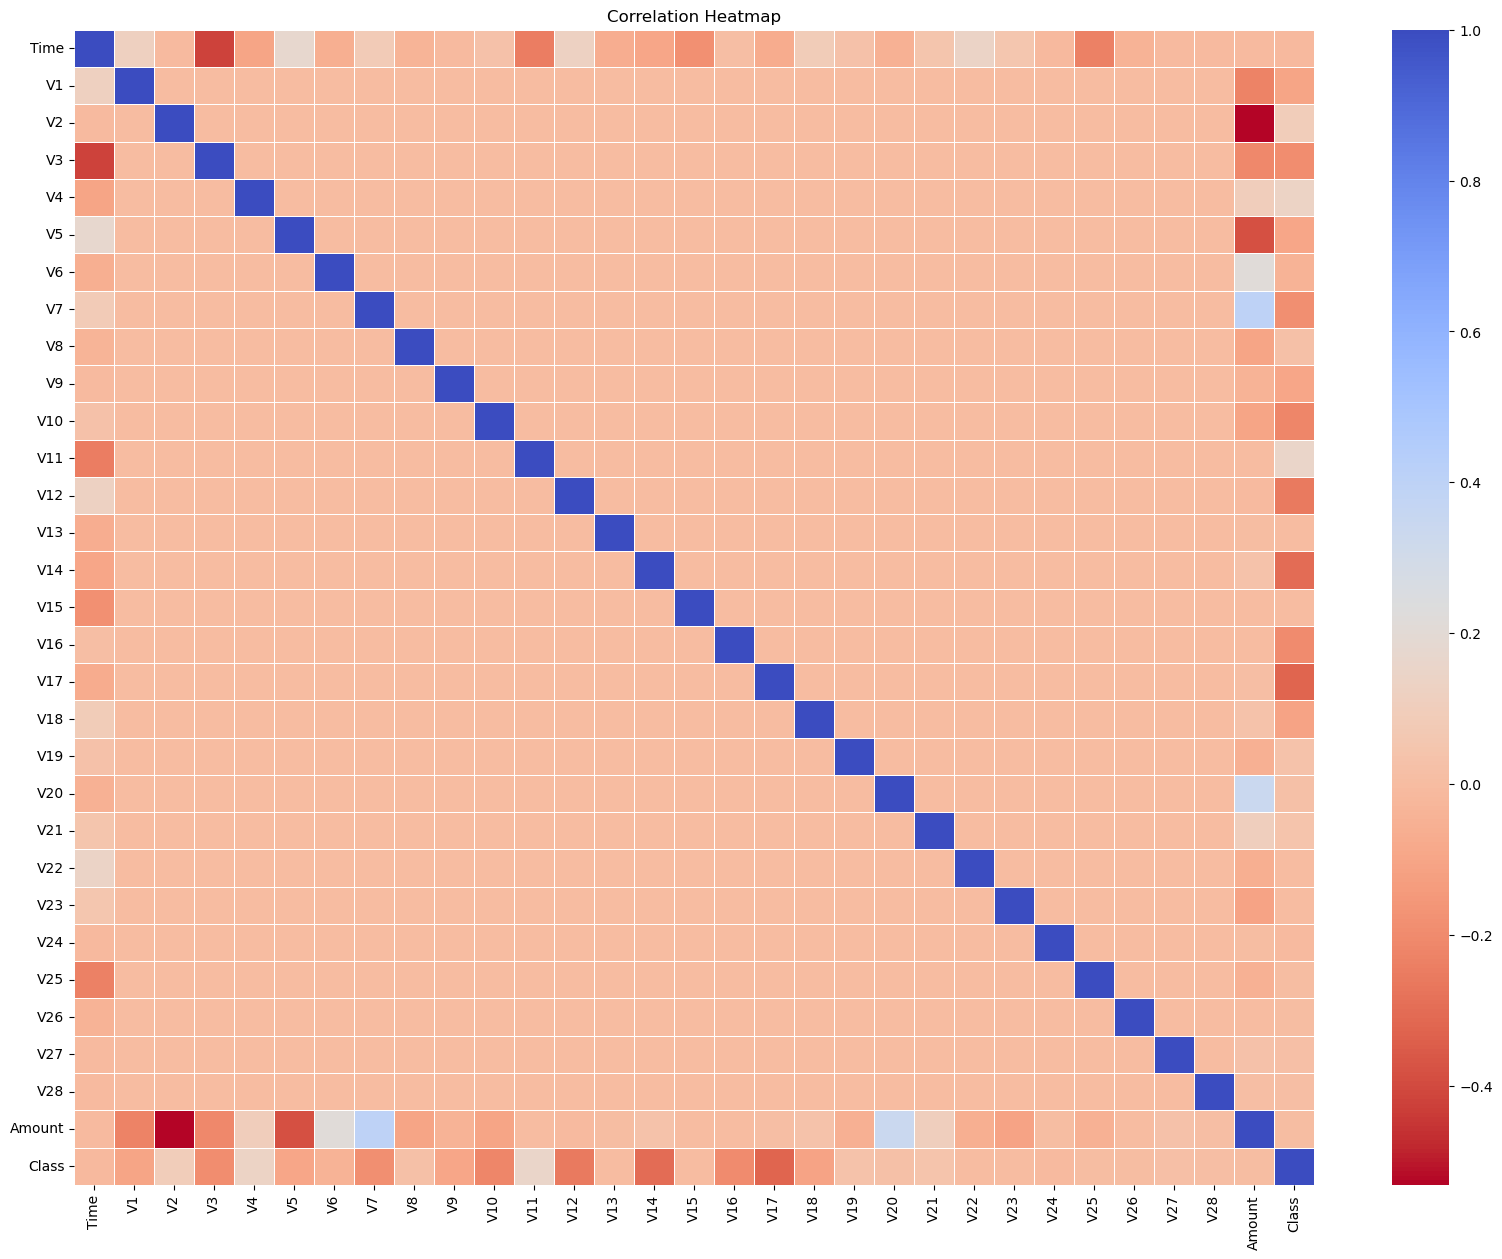

In [8]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm_r', linewidths=0.5, annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Boxplots for Top Features

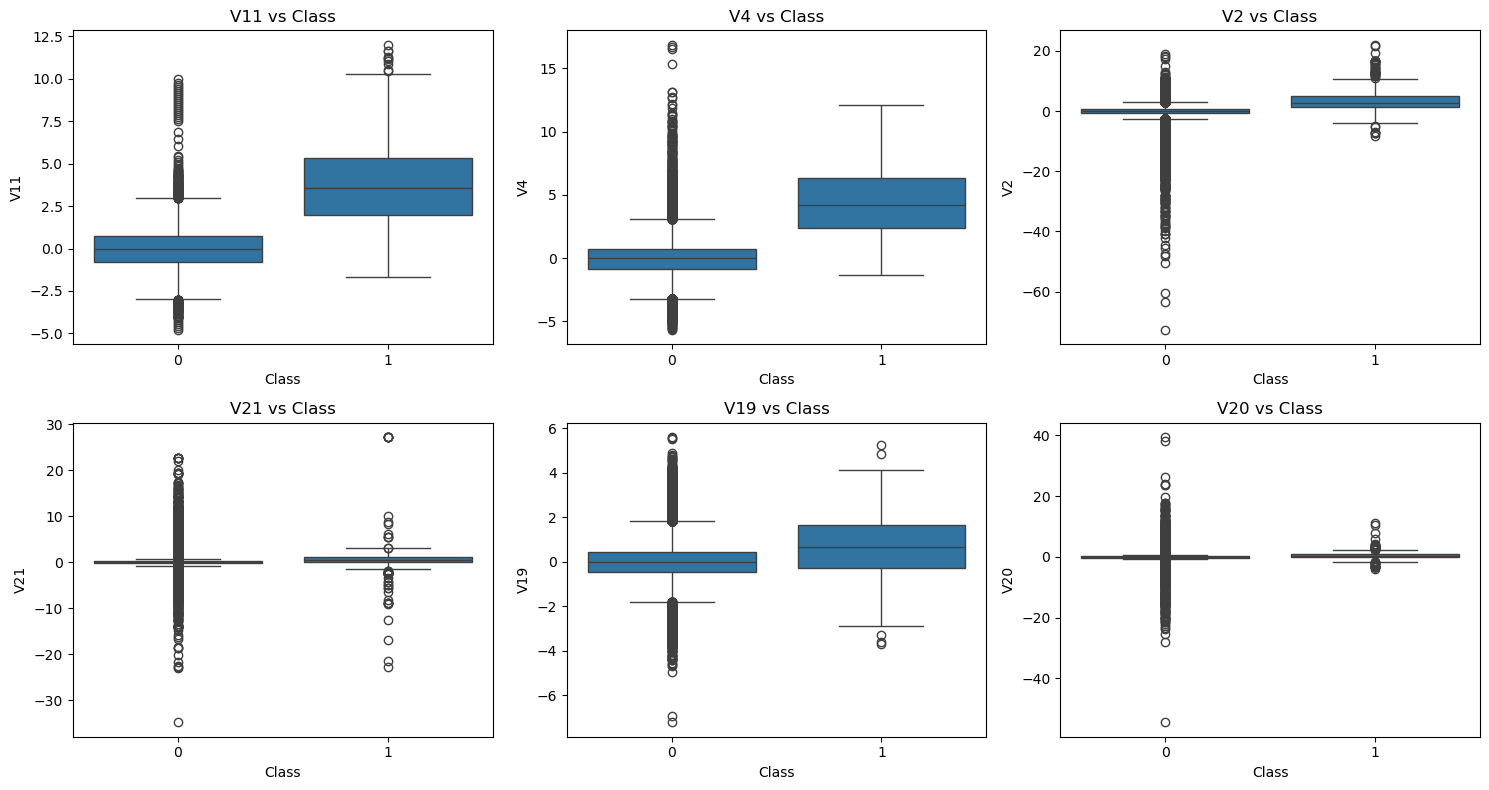

In [9]:
top_features = corr_with_class[1:7].index  # Top 6 features (excluding 'Class')

plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')
plt.tight_layout()
plt.show()

# Distribution of PCA Features by Class

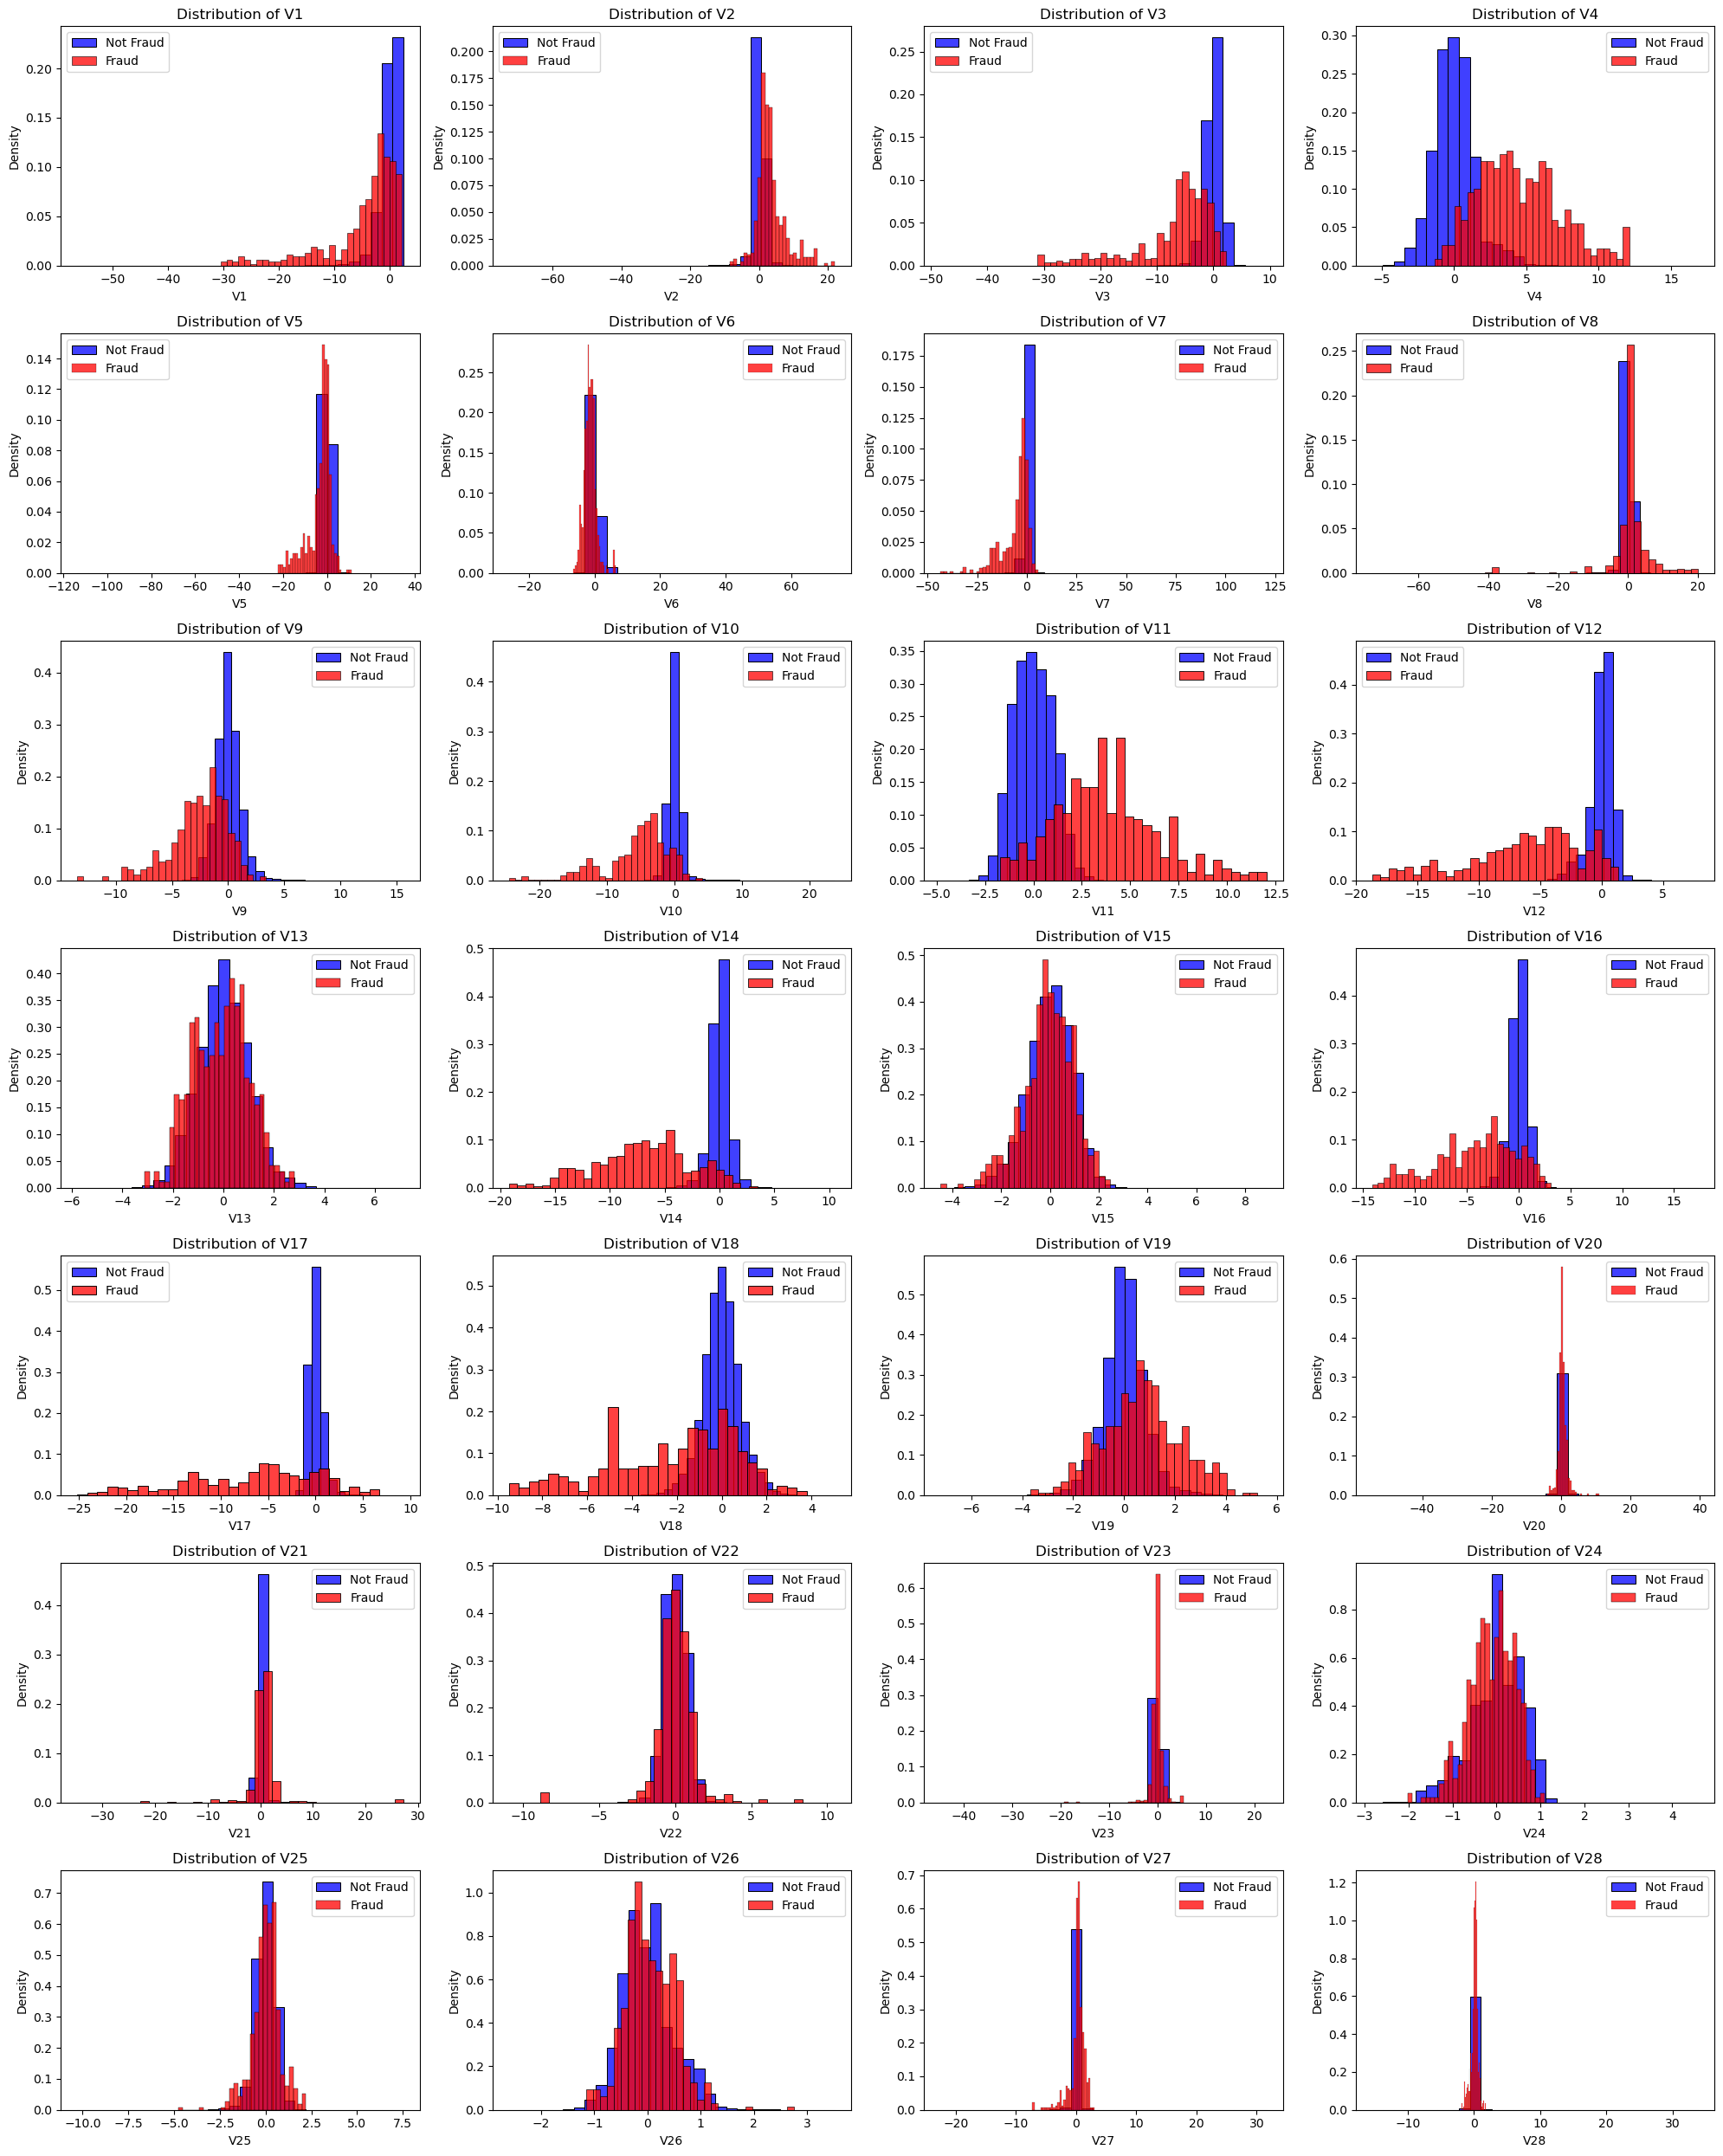

In [ ]:
fig, axes = plt.subplots(7, 4, figsize=(20, 25))
axes = axes.flatten()
for i, col in enumerate([f'V{i}' for i in range(1, 29)]):
    sns.histplot(df[col][df['Class'] == 0], bins=30, color='blue', label='Not Fraud', ax=axes[i], stat='density')
    sns.histplot(df[col][df['Class'] == 1], bins=30, color='red', label='Fraud', ax=axes[i], stat='density')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

plt.tight_layout()
# plt.savefig('pca.png')
plt.show()


# Outlier Detection (Amount and Time)

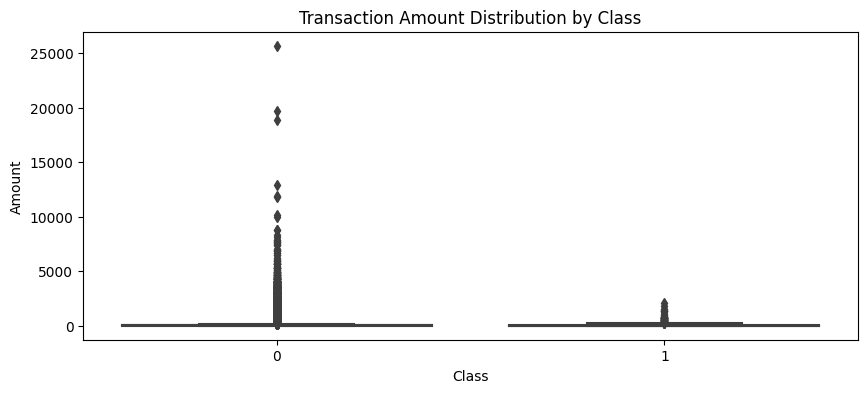

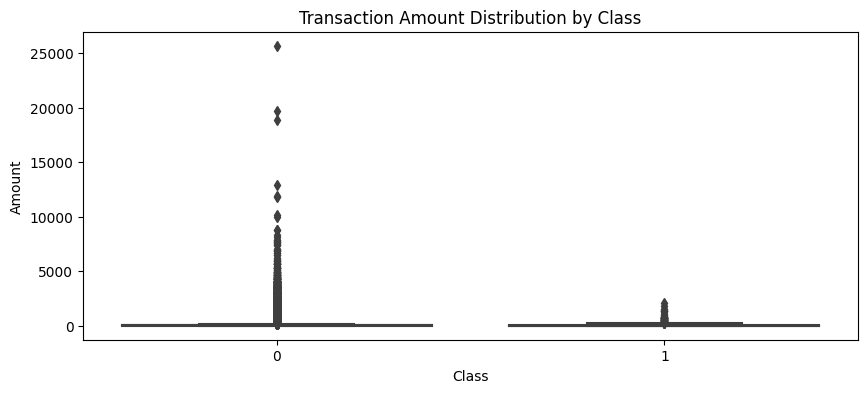

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Transaction Amount Distribution by Class')
plt.show()
